Titanic Exploratory Data Analysis (EDA)

Overview

Understand the Data
    Numerical data
    Categorical data
    Relationships using Charts

Explore Emerging Themes
    Survival rates
    Effect of location Location
    Gender
    Family
    Age
    Ticket price 
    
Data preprocessing
    Drop unnecessary columns
    Investigate cardinality
    Fill in missing data through Imputation
    Correlation to determine multicollinearity
    Normalize data
    
Data Source: https://data.worldbank.org/indicator/SP.POP.TOTL

Import libraries

In [127]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
import numpy as np
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

Import data

In [35]:

df = pd.read_csv(r"C:\Users\Administrator\Desktop\train.csv")

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Understand the data

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


There are categorical and numeric data
Categorical columns  - Name, Sex, Ticket, Cabin, Embarked
Numeric columns - Survived, Pclass, Age, SibSp, Parch, Fare


Divide data into numeric and categotical data to understand relationships

In [38]:
3Divide data into categorical and numerical 
df_num = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
df_cat = df[["Name", "Sex", "Ticket", "Cabin", "Embarked"]]

In [39]:
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [40]:
df_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [41]:
#Missing Data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


How to handle missing data - 

The rule of thumb is if 50% of data is missing, drop column, otherwise, impute with mean or median.

Age column has 19% of its data missing, hence impute with fillna method.

Cabin has 77% of its data missing - as shown below, hence "Cabin" column needs to be dropped.

In [42]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [62]:
#df["Age"][df["Age"].isnull()].fillna(np.mean)

5      <function mean at 0x000001FF77BFB4C0>
17     <function mean at 0x000001FF77BFB4C0>
19     <function mean at 0x000001FF77BFB4C0>
26     <function mean at 0x000001FF77BFB4C0>
28     <function mean at 0x000001FF77BFB4C0>
                       ...                  
859    <function mean at 0x000001FF77BFB4C0>
863    <function mean at 0x000001FF77BFB4C0>
868    <function mean at 0x000001FF77BFB4C0>
878    <function mean at 0x000001FF77BFB4C0>
888    <function mean at 0x000001FF77BFB4C0>
Name: Age, Length: 177, dtype: object

Drop the following unnecessary columns PassengerId, Name, Cabin, and Ticket

Name and ticket have high cardinality as shown below, hence will be dropped


In [63]:
df.select_dtypes("object").nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [100]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis="columns")

It is time to explore to understand the distributions and the relationships between them

Let's start with a histogram that shows the age distribution


We find that the ages of the passengers are evenly distributed while the rest of the numerical variables are skewed as shown in the below charts.
    
This is interesting because it points to the need to normalize our entire data before we subject it to model building. We will handle that later on. 


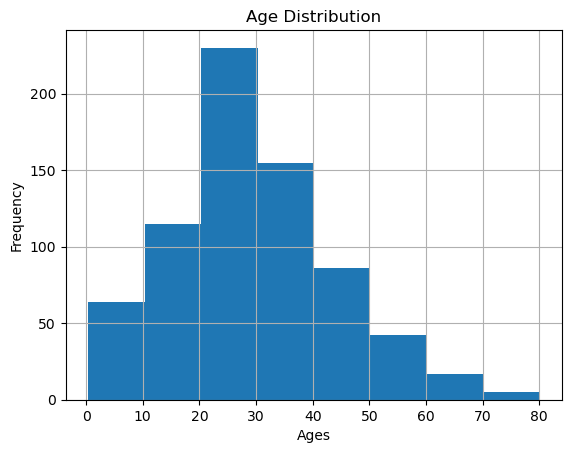

In [65]:
df["Age"].hist(bins=8)
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution");

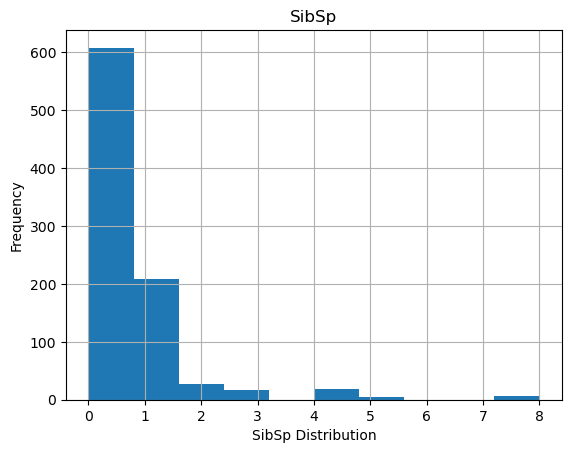

In [66]:
df["SibSp"].hist()
plt.xlabel("SibSp Distribution")
plt.ylabel("Frequency")
plt.title("SibSp");

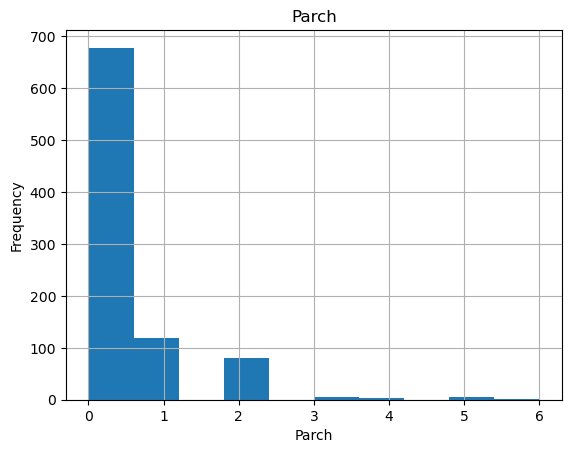

In [67]:
df["Parch"].hist()
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.title("Parch");

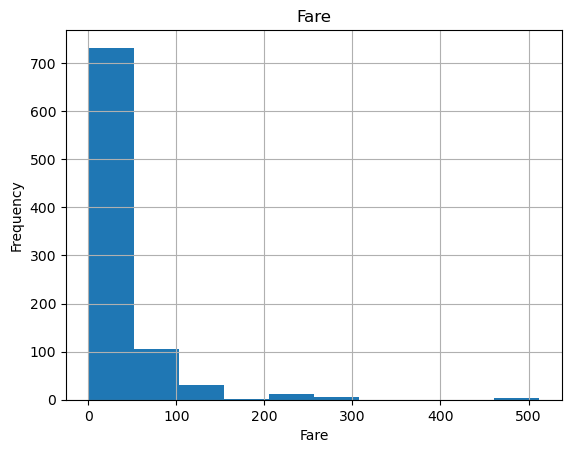

In [68]:
df["Fare"].hist()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare");

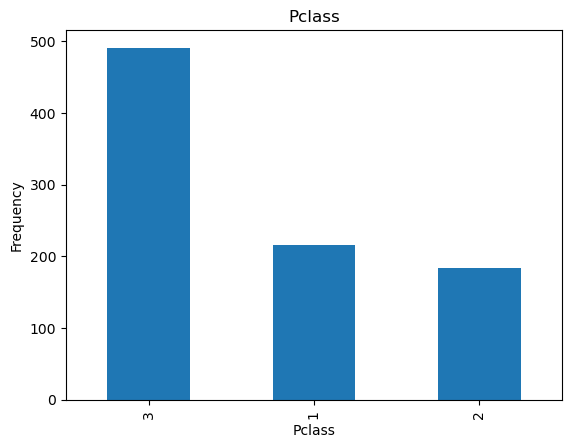

In [69]:
df["Pclass"].value_counts().plot(
    kind="bar",
    xlabel="Pclass",
    ylabel="Frequency",
    title="Pclass"
);

Its time to understand categorical variables. Starting with gender, we can see that there were more male than female passengers. Quite as many passengers embarked from Southampton than Cherbough and Queenstown combined and if we group by the rate of survival, we can determine more detailed information such as the proportion of each gender that survived from each location and their ages. 
 

<Axes: title={'center': 'Distribution by Gender'}, xlabel='Sex', ylabel='Frequency'>

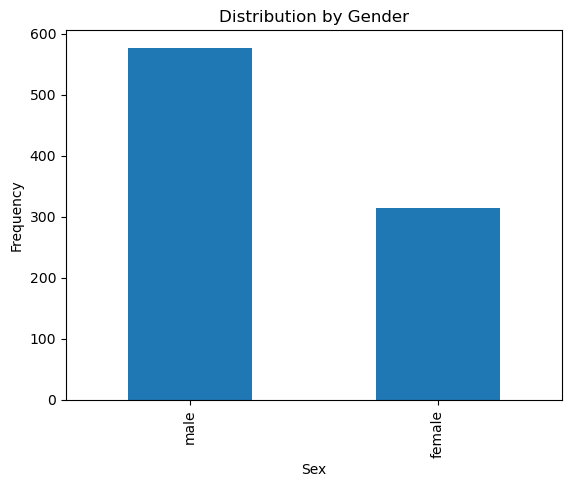

In [71]:
df["Sex"].value_counts().plot(kind="bar",
                                           xlabel="Sex",
                                            ylabel="Frequency",
                                            title="Distribution by Gender"
                                            )

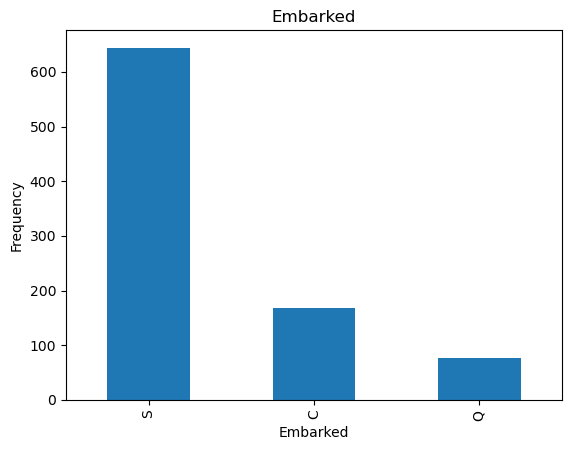

In [73]:
df["Embarked"].value_counts().plot(
    kind="bar",
    xlabel="Embarked",
    ylabel="Frequency",
    title="Embarked"
);

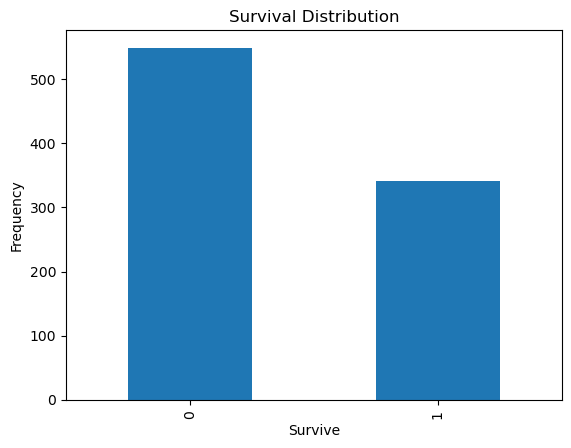

In [94]:
df["Survived"].value_counts().plot(
    kind="bar",
    xlabel="Survive",
    ylabel="Frequency",
    title="Survival Distribution"
);

In [112]:
df.groupby(["Embarked", "Sex"])[["Survived", "Fare"]].sum()

Survived       Fare
Embarked Sex                        
C        female        64  5487.3958
         male          29  4584.9004
Q        female        27   454.8585
         male           3   567.3958
S        female       140  7864.4085
         male          77  9574.9903

In [115]:
df.groupby(["Pclass", "Sex"])[["Survived", "Fare"]].count()

Survived  Fare
Pclass Sex                   
1      female        94    94
       male         122   122
2      female        76    76
       male         108   108
3      female       144   144
       male         347   347

Diving in further, we can use a pivot table to explore the relationship between the likelihood of survival for different ages, family type and fare.

Shows that younger were more likely to survive than older folks. Also, those who paid more for the cruise were more likely to survive, that is, first class tickets
                                                                                                                                     
Those with parents were also likely to survive however, if you had a sibling, data shows low chance of survival


In [96]:
pd.pivot_table(df, index= "Survived", values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Probing further, it is clear more of first-class ticket holders survived than second and third-class ticket holders. 

More males did not survive than females and more females survived than males

In [97]:

pd.pivot_table(df, index = "Survived", columns = "Pclass", values = "Ticket", aggfunc = "count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [98]:

pd.pivot_table(df, index = "Survived", columns = "Sex", values = "Ticket", aggfunc = "count")

Sex,female,male
Survived,,
0,81,468
1,233,109


In [101]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


A correlation matrix shows the correlation coefficients of our variables and help us summarize the datasets and visualize the patterns or relationships.

Interestingly, the correlation matrix shows the family size (SibSp and Parch) have some multicollinearity. This might imply either could be a candidate of omission in our analysis. However, since the correlation is less than 0.5, changes in one variable is unlikely to affect the changes in the other to the extent it affects the target variable. 

The second heatmap shows survival is positively correlated with fare and negatively correlated with passenger class. The passengers in 1st class were more likely to survive than those in second and third class. 



In [105]:
corr = df.select_dtypes("number").drop(columns="Survived").corr()
corr.style.background_gradient(axis=None)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

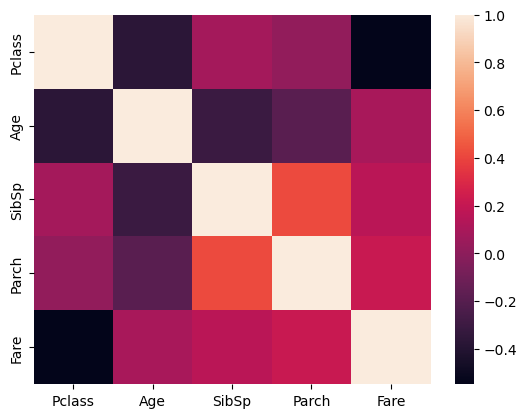

In [106]:
sns.heatmap(corr)

In [117]:
corr_survive = df.select_dtypes("number").corr()
corr_survive.style.background_gradient(axis=None)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

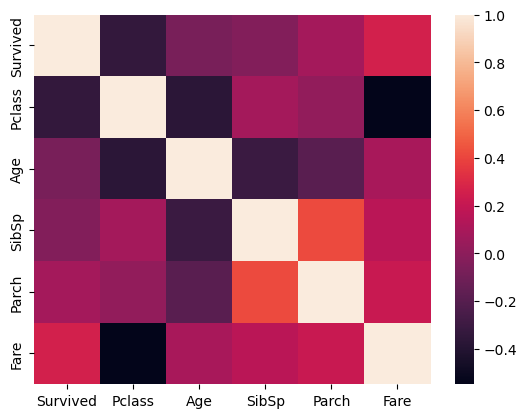

In [118]:
sns.heatmap(corr_survive)

A boxplot shows the distribution of the survivers relative to the fare paid. There is considerable differences betweeen the fares paid by those who survived and thosed who did not
with the latter being lower. It is understandable given the common relation between the value of the ticket one possess and comfort, and by extension death in this case.

<Axes: xlabel='Survived', ylabel='Fare'>

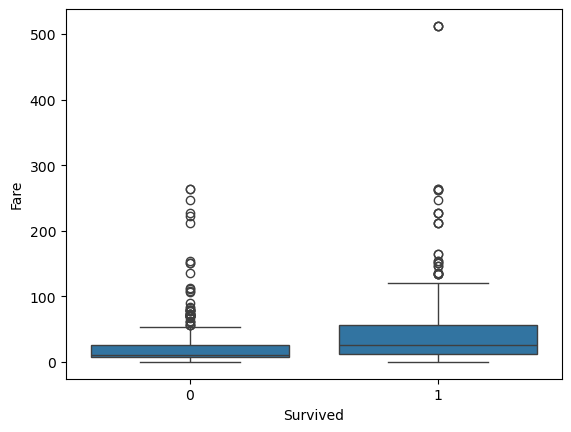

In [119]:
sns.boxplot(x="Survived", y="Fare", data = df)

The next step is to divide the data into target and features and training and testing set

In [120]:
target = "Survived"
X = df.drop(columns=target)
y = df[target]
print("X shape", X.shape)
print("Y shape", y.shape)

X shape (891, 7)
Y shape (891,)


Training and Test data

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (712, 7)
y_train (712,)
X_test (179, 7)
y_test (179,)


Since we have missing data, we will use a transformer to impute the missing values before we put it into a predictor


In [133]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       572 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


But first, we have to convert categorical variables in Age and Embarked columns to numeric values using OneHotEncoder

NB: Tranformers are not usually separated from predictors but we have done so for the sake of learning. 

In [143]:
ohe= OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)


OneHotEncoder(cols=['Sex', 'Embarked'], use_cat_names=True)

In [145]:
XT_train = ohe.transform(X_train)

In [147]:
XT_train

,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Embarked_nan
331,1,1,0,45.5,0,0,28.5000,1,0,0,0
733,2,1,0,23.0,0,0,13.0000,1,0,0,0
382,3,1,0,32.0,0,0,7.9250,1,0,0,0
704,3,1,0,26.0,1,0,7.8542,1,0,0,0
813,3,0,1,6.0,4,2,31.2750,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,3,0,1,21.0,0,0,7.6500,1,0,0,0
270,1,1,0,NaN,0,0,31.0000,1,0,0,0
860,3,1,0,41.0,2,0,14.1083,1,0,0,0
435,1,0,1,14.0,1,2,120.0000,1,0,0,0


In [148]:
imputer = SimpleImputer()
imputer.fit(XT_train)

SimpleImputer()

As shown below, there are no null values in our data set, hence we can now start the model building and testing phase


In [164]:
XTI_train = imputer.transform(XT_train)
pd.DataFrame(XTI_train, columns = XT_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        712 non-null    float64
 1   Sex_male      712 non-null    float64
 2   Sex_female    712 non-null    float64
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    float64
 5   Parch         712 non-null    float64
 6   Fare          712 non-null    float64
 7   Embarked_S    712 non-null    float64
 8   Embarked_C    712 non-null    float64
 9   Embarked_Q    712 non-null    float64
 10  Embarked_nan  712 non-null    float64
dtypes: float64(11)
memory usage: 61.3 KB


The below is a pipeline with imputer, encoder, and decision tree classifier all put together. 


In [ ]:
model = make_pipeline(
    SimpleImputer(), OneHotEncoder(), DecisionTreeClassifier(random_state=42)
)
model.fit(X_train, y_train)

In the next section, we will train the model, evaluate, and make predictions. See you!